In [8]:
import numpy as np
import pandas as pd
import scipy
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import preprocessing

from scipy.stats import pearsonr

In [172]:
TeamStats = pd.read_csv("TeamStatistics.csv")
rankings = [93,69,58,72,79,52,108,78,67,72,75,74,83,79,84,81,79,59,85,68,74,83,89,63,73,91,67,58,90,65,81]
TeamStats["rankings"] = rankings

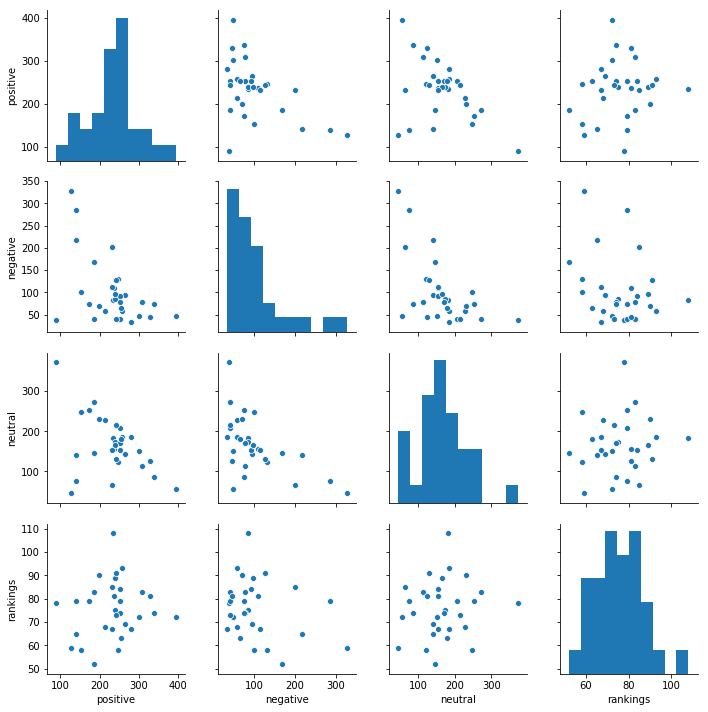

In [13]:
sb.pairplot(TeamStatsCluster)

In [26]:
pearsonr_coefficient, p_value = pearsonr(TeamStats['positive'],TeamStats['rankings'])
print(pearsonr_coefficient)
print(p_value)

0.15061696581372674
0.41864894533687624


In [27]:
pearsonr_coefficient, p_value = pearsonr(TeamStats['negative'],TeamStats['rankings'])
print(pearsonr_coefficient)
print(p_value)

-0.24904299499328378
0.1766855629010649


In [28]:
pearsonr_coefficient, p_value = pearsonr(TeamStats['neutral'],TeamStats['rankings'])
print(pearsonr_coefficient)
print(p_value)

0.11448495483864765
0.539709411076283


In [86]:
Alter_TeamStats = TeamStats.copy()
Alter_TeamStats["positive"] = TeamStats["positive"]/500*100
Alter_TeamStats["negative"] = TeamStats["negative"]/500*100
Alter_TeamStats['neutral'] = TeamStats["neutral"]/500*100
Alter_TeamStats['rankings'] = TeamStats["rankings"]/108*100

In [87]:
Normalize_TeamStats = preprocessing.normalize(Alter_TeamStats[['positive','negative','neutral','rankings']])

In [170]:
new_Alter_TeamStats = Alter_TeamStats.copy()
new_Alter_TeamStats["MR"] = Alter_TeamStats['positive']*2 - (Alter_TeamStats['negative']  ) * -1
new_Alter_TeamStats.sort_values(by=['negative'], ascending=False)

,Team,positive,negative,neutral,rankings,MR
17,New_Jersey_Devils,25.4,65.4,9.2,54.629630,116.2
4,Montreal_Canadiens,27.8,57.0,15.2,73.148148,112.6
29,Vancouver_Canucks,28.2,43.6,28.2,60.185185,100.0
18,New_York_Islanders,46.6,40.2,13.2,78.703704,133.4
5,Ottawa_Senators,37.2,33.6,29.2,48.148148,108.0
2,Detroit_Red_Wings,49.2,26.2,24.6,53.703704,124.6
25,Calgary_Flames,48.6,25.4,26.0,84.259259,122.6
26,Edmonton_Oilers,46.6,22.6,30.8,62.037037,115.8
15,Carolina_Hurricanes,47.2,21.8,31.0,75.000000,116.2
27,Los_Angeles_Kings,30.6,20.0,49.4,53.703704,81.2


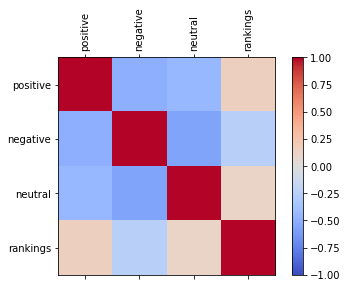

In [157]:
data = Alter_TeamStats[['positive','negative','neutral','rankings']]
corr = data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()